In [1]:
!wget 'https://raw.githubusercontent.com/karencfisher/dcgan/main/dcgan.py'

--2022-11-15 17:01:46--  https://raw.githubusercontent.com/karencfisher/dcgan/main/dcgan.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8468 (8.3K) [text/plain]
Saving to: ‘dcgan.py’

dcgan.py            100%[===================>]   8.27K  --.-KB/s    in 0s      

2022-11-15 17:01:46 (86.6 MB/s) - ‘dcgan.py’ saved [8468/8468]



In [2]:
# Needs matplotlib version 3.3.4
!pip install matplotlib==3.3.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.5 MB 9.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

from tensorflow.keras.datasets import cifar10
import tensorflow as tf

from dcgan import DCGAN, Preprocessor

Load the fashion-mnist data set and preprocess images (scale and flatten)

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
model_path = None
#model_path = '/content/drive/MyDrive/cifar10_models'
dcgan = DCGAN(X_train.shape[1:], model_path=model_path)

In [5]:
# scaling

dcgan.preprocessor.fit(X_train)
X_train = dcgan.preprocessor.transform(X_train)


Look at a sample of the original images

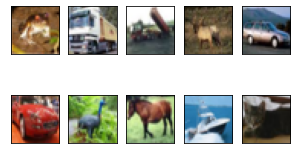

In [6]:
fig, ax = plt.subplots(2, 5, figsize=(5, 3))
fig.patch.set_facecolor('white')
for indx, img in enumerate(X_train[:10]):
    i, j = indx // 5, indx % 5
    img = dcgan.preprocessor.inverse(img)
    img = img.astype(int)
    ax[i, j].imshow(img, cmap=plt.cm.binary)
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])

Instantiate and train our DCGAN

Epoch 1: 100%|##########| 500/500 [04:54<00:00,  1.70it/s]


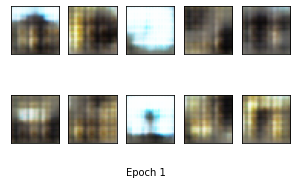

Epoch 5: 100%|##########| 500/500 [04:47<00:00,  1.74it/s]


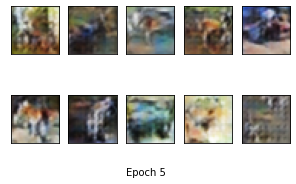

Epoch 10: 100%|##########| 500/500 [04:46<00:00,  1.75it/s]


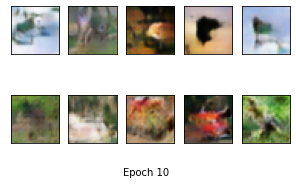

Epoch 15: 100%|##########| 500/500 [04:47<00:00,  1.74it/s]


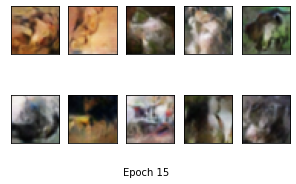

Epoch 20: 100%|##########| 500/500 [04:48<00:00,  1.73it/s]


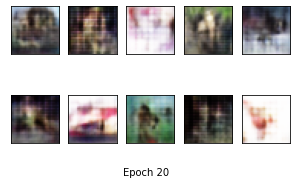

Epoch 25: 100%|##########| 500/500 [04:47<00:00,  1.74it/s]


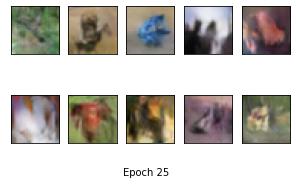

Total training time: 2:00:12


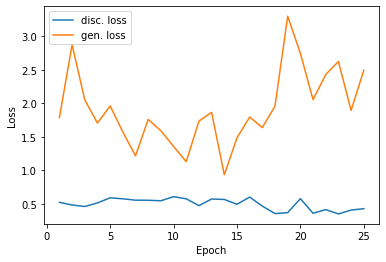

Saving models

updating: content/drive/MyDrive/cifar10_models/ (stored 0%)
updating: content/drive/MyDrive/cifar10_models/dcgan.h5 (deflated 8%)
updating: content/drive/MyDrive/cifar10_models/discriminator.h5 (deflated 9%)
updating: content/drive/MyDrive/cifar10_models/generator.h5 (deflated 9%)


In [7]:
epochs = 25
d_losses, g_losses = dcgan.train(X_train, epochs, 100, verbose=5)

plt.plot(range(1, epochs+1), d_losses, label='disc. loss')
plt.plot(range(1, epochs+1), g_losses, label='gen. loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print('Saving models\n')
dcgan.save_model('/content/drive/MyDrive/cifar10_models')
!zip -r /content/drive/MyDrive/cifar_10_models.zip /content/drive/MyDrive/cifar10_models